<a href="https://colab.research.google.com/github/Ridhotegar25/Prediksi_Gagal_Jantung_ANN/blob/main/Prediski_Gagal_Jantung_dengan_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

versi lengkap collab ini: https://colab.research.google.com/drive/1g5bBtweXOGMwsrPZ48_xmaYgyLavC2_O?usp=sharing

Penyakit kardiovaskular adalah penyebab kematian paling umum di seluruh dunia, diperkirakan merenggut 17,9 juta jiwa setiap tahunnya, yang merupakan 31% dari seluruh kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh penyakit kardiovaskular. Hal ini ditandai dengan ketidakmampuan jantung untuk memompa suplai darah yang memadai ke tubuh. Tanpa aliran darah yang cukup, semua fungsi utama tubuh akan terganggu. Gagal jantung adalah suatu kondisi atau kumpulan gejala yang melemahkan jantung.

Untuk mengatasi masalah ini, maka dikembangkan model machine learning yang bertujuan untuk memprediksi risiko gagal jantung. Model ini memanfaatkan berbagai data medis dan klinis untuk memberikan prediksi yang akurat dan membantu dalam diagnosis dini, sehingga intervensi medis dapat dilakukan lebih cepat dan efektif, meningkatkan peluang hidup pasien dan kualitas hidup mereka.

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Mounted Gdrive and Download Dataset from Kaggle

Link Dataset yang digunakan : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Project'

In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 11.2MB/s]


# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [ ]:
#loading data
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: Jika pasien memiliki kadar hemoglobin di bawah kisaran normal
* creatinine_phosphokinase:  Tingkat kreatin fosfokinase dalam darah dalam mcg/L
* diabetes: Jika pasien terjangkit diabetes
* ejection_fraction: Ejection fraction (pengukuran berapa banyak darah yang dipompa oleh ventrikel kiri pada setiap kontraksi)
* high_blood_pressure: jika pasien terjangkit hypertension
* platelets: Jumlah trombosit darah dalam kiloplatelet/mL
* serum_creatinine: Tingkat kreatinin serum dalam darah dalam mg/dL
* serum_sodium: Tingkat natrium serum dalam darah dalam mEq/L
* sex: gender
* smoking: Jika pasien merokok secara aktif atau pernah merokok di masa lalu
* time: Ini adalah waktu kunjungan tindak lanjut pasien untuk penyakit ini dalam beberapa bulan
* DEATH_EVENT: Jika pasien meninggal dunia selama masa tindak lanjut


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**



In [ ]:
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


<ipython-input-11-31c33086e8ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["DEATH_EVENT"], palette= cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

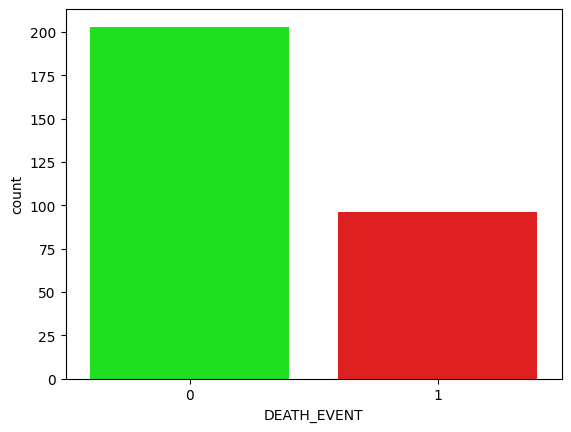

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#00FF00","#FF0000"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

kesimpulan : dari visualisasi diatas terdapat ketidakseimbangan data

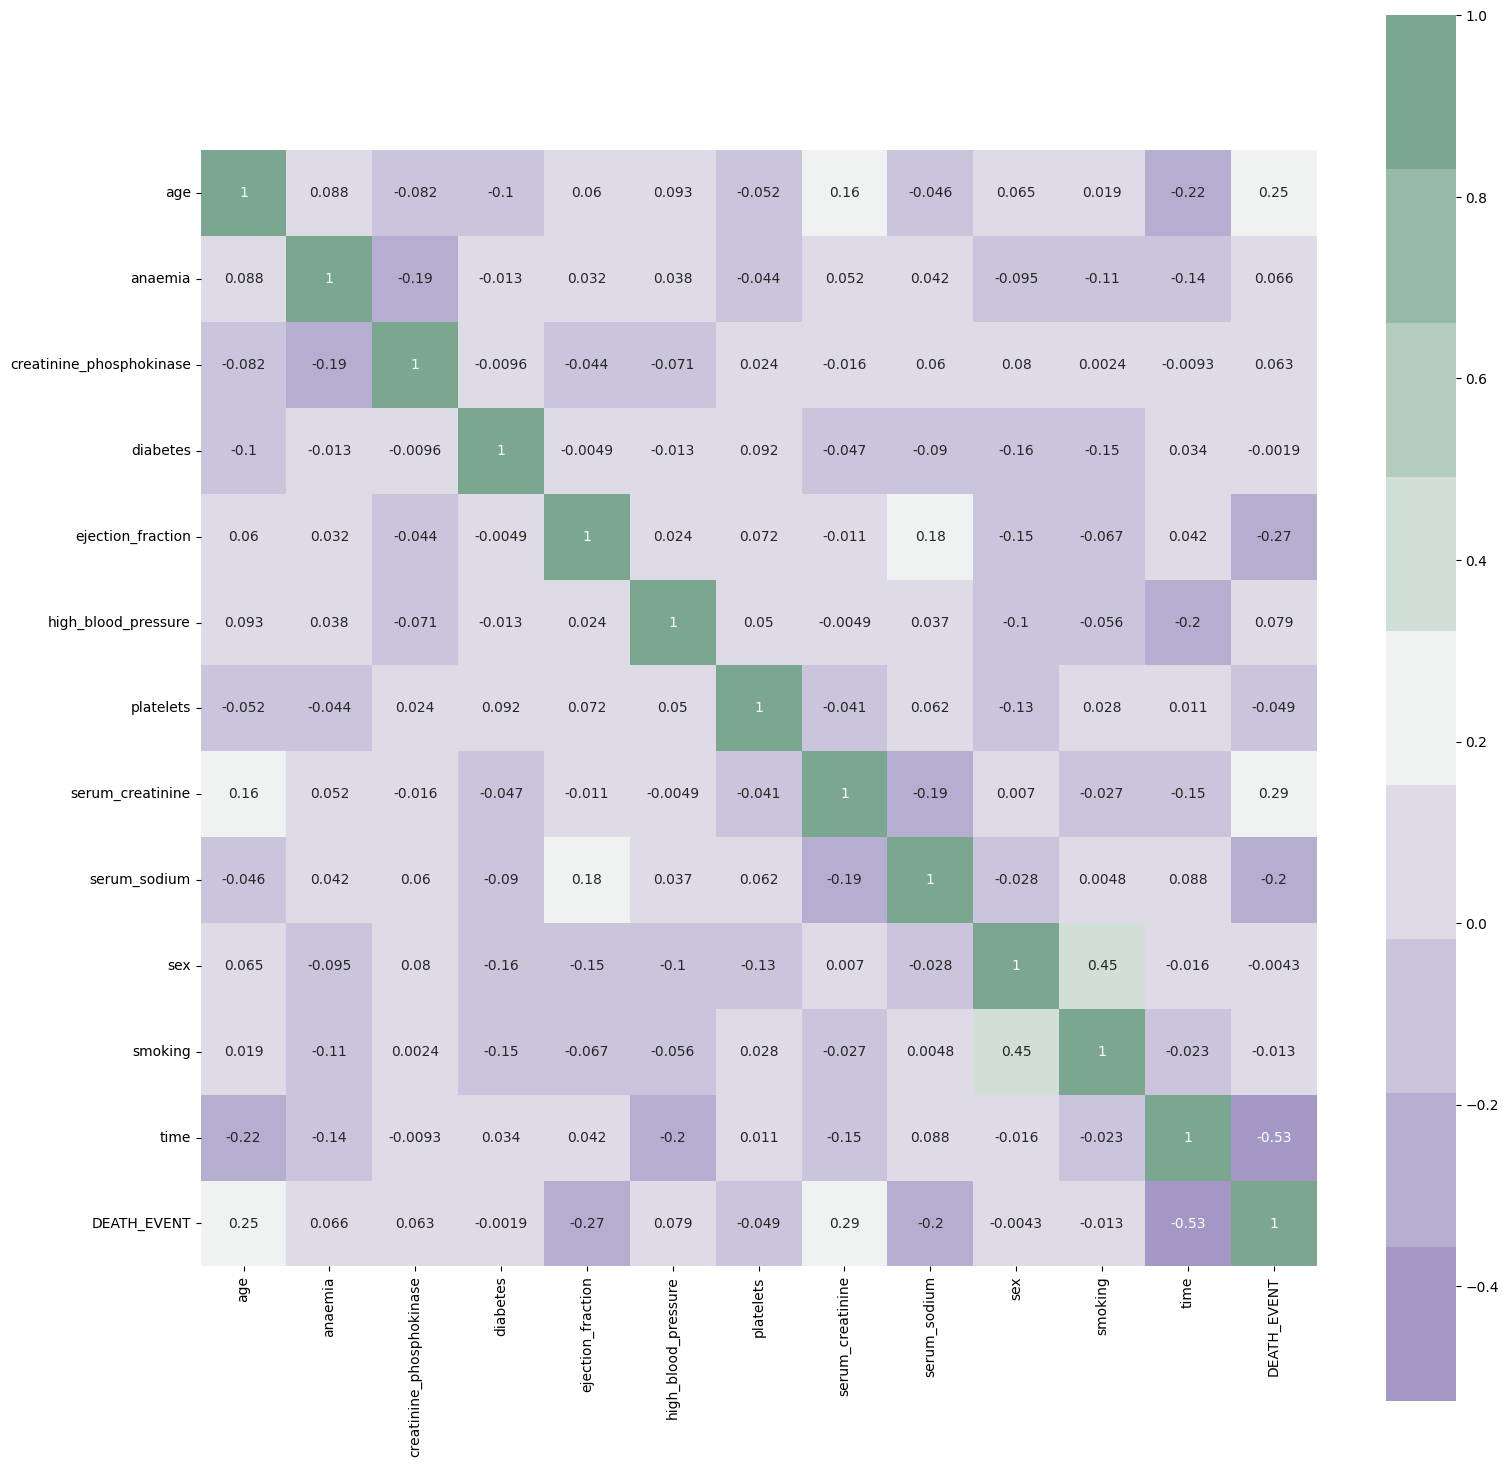

In [ ]:
#Examaning a corelation matrix of all the features
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**Notable points:**
* Waktu kunjungan tindak lanjut pasien untuk penyakit ini sangat penting karena diagnosis awal dengan masalah kardiovaskular dan pengobatan mengurangi kemungkinan kematian. Hal ini memiliki hubungan yang terbalik.
* Ejection fraction adalah fitur terpenting kedua. Hal ini sangat diharapkan karena pada dasarnya merupakan efisiensi jantung
* Age pasien adalah fitur ketiga yang paling berkorelasi. Jelas bahwa fungsi jantung menurun seiring dengan bertambahnya usia.

Text(0.5, 1.0, 'Distribution Of Age')

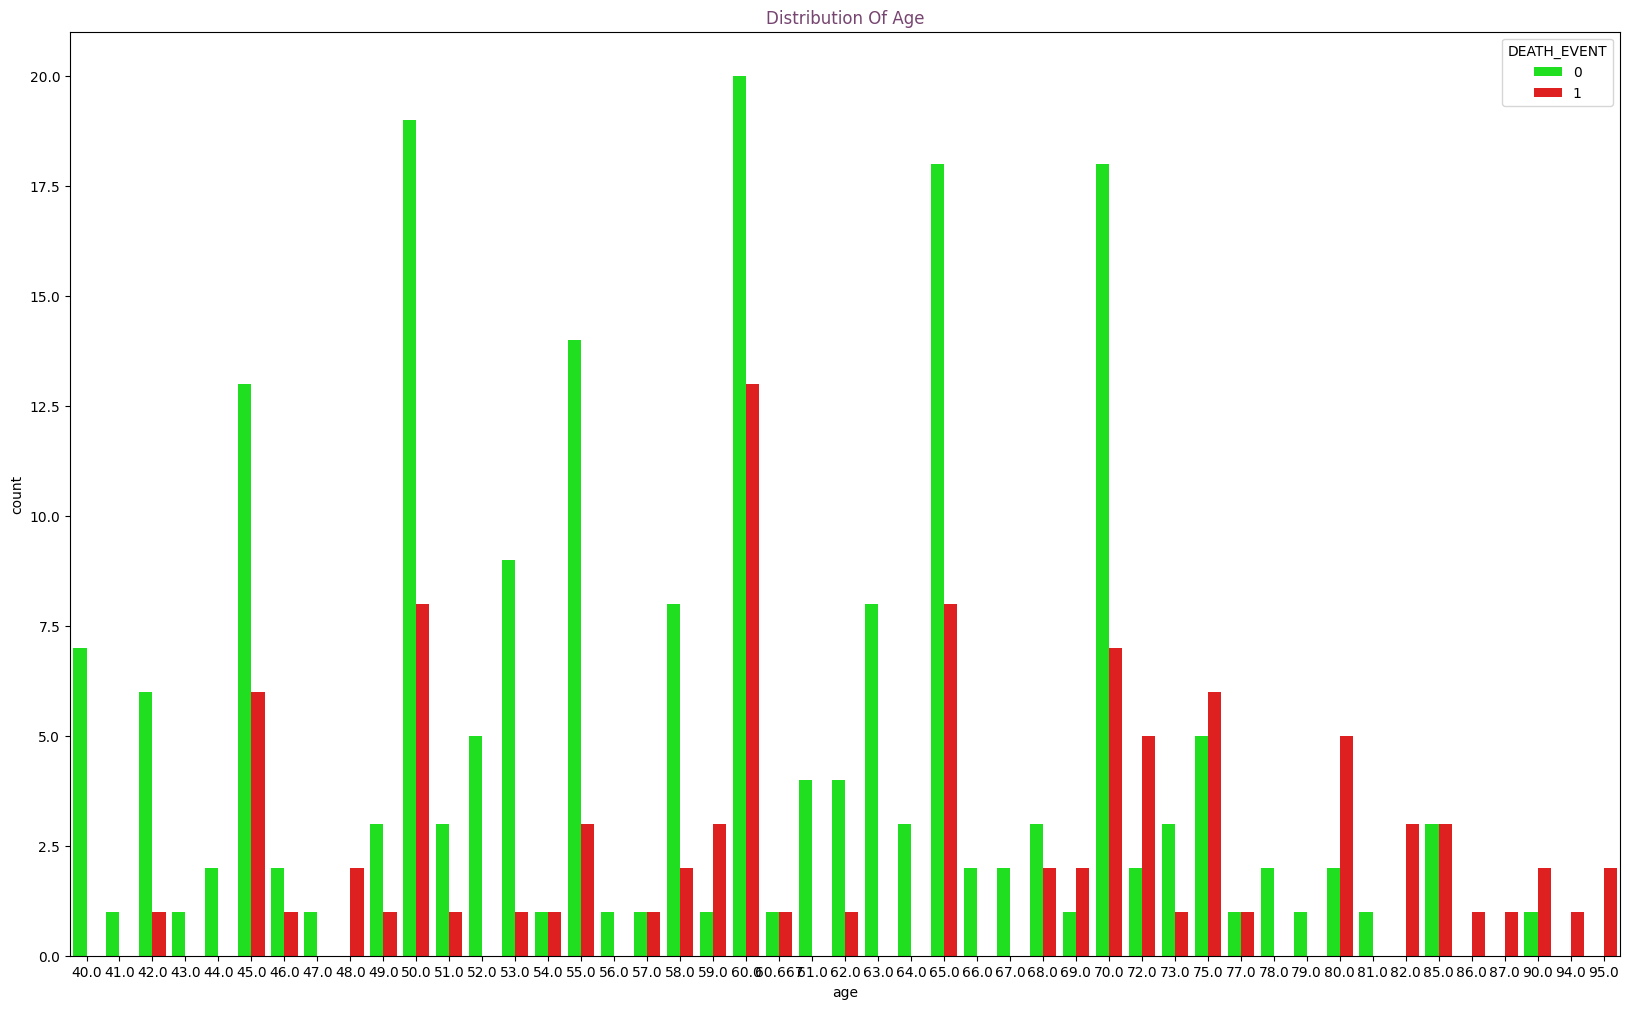

In [ ]:
#Evauating age distrivution
plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

<ipython-input-14-1b272228e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


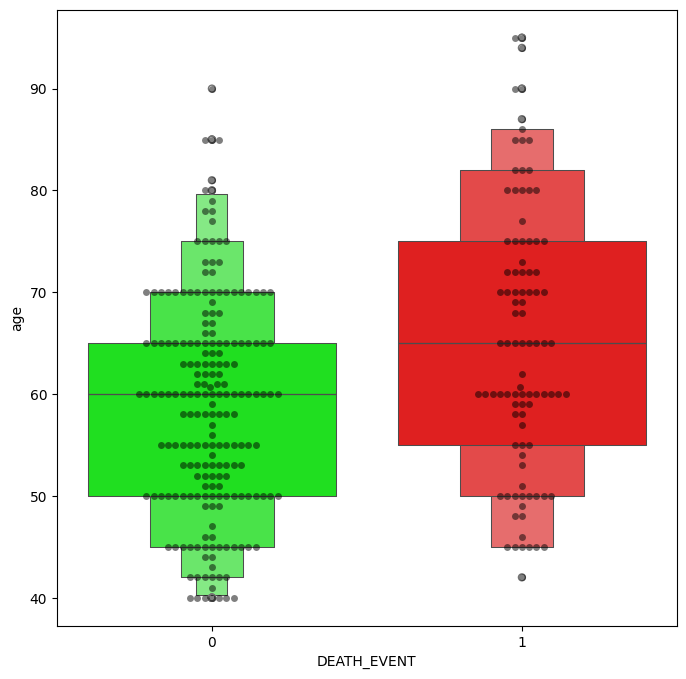

<ipython-input-14-1b272228e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


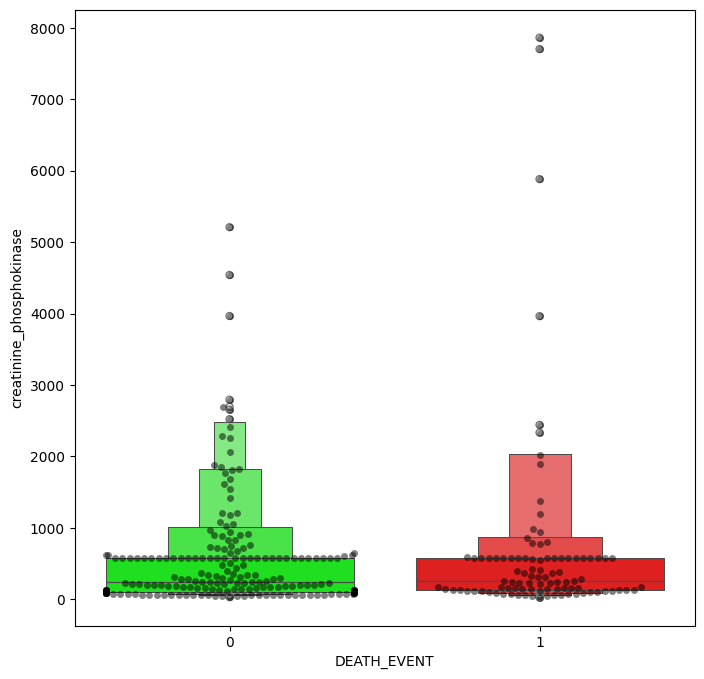

<ipython-input-14-1b272228e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


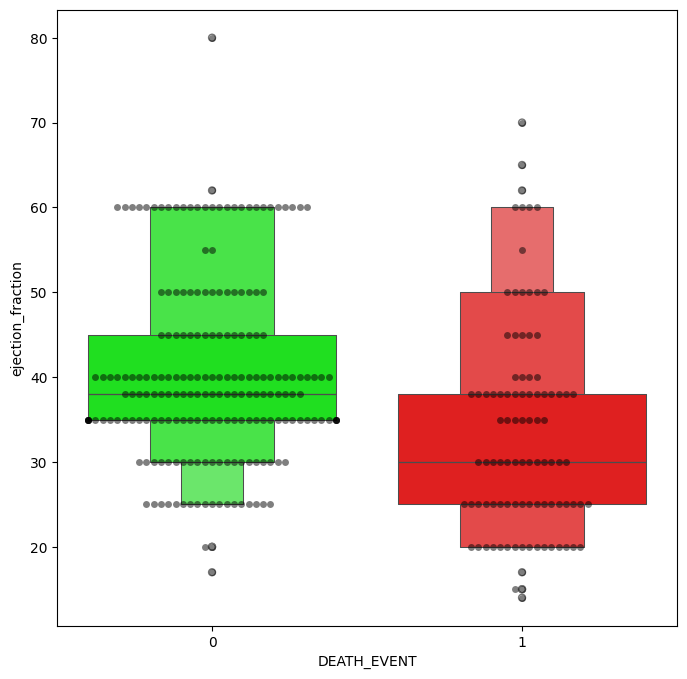

<ipython-input-14-1b272228e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


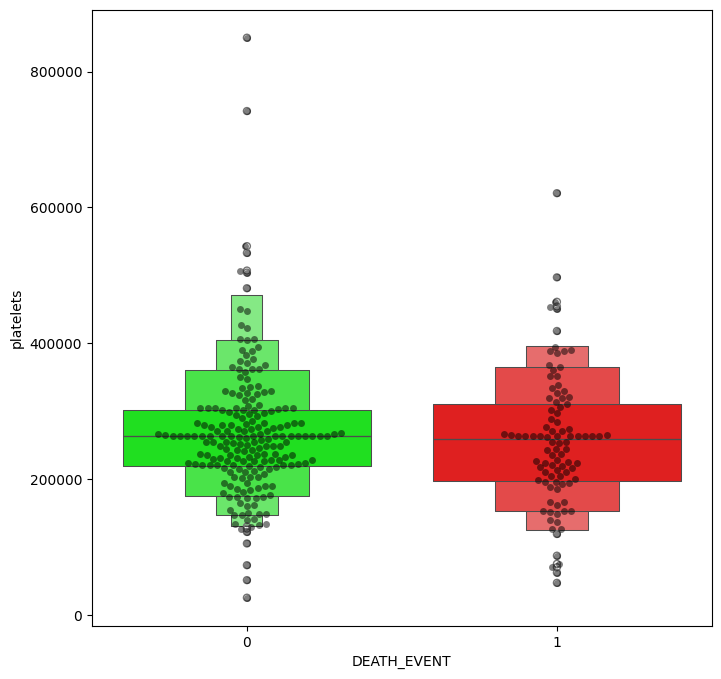

<ipython-input-14-1b272228e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


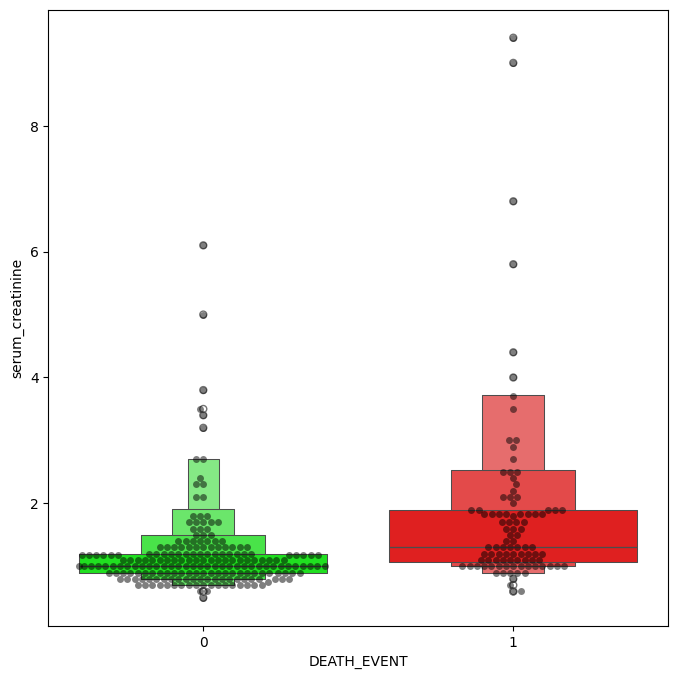

<ipython-input-14-1b272228e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


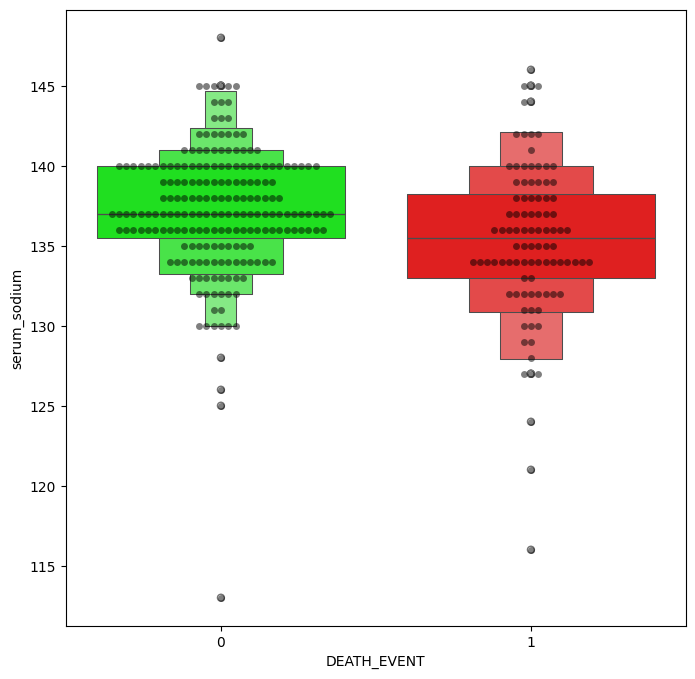

<ipython-input-14-1b272228e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)


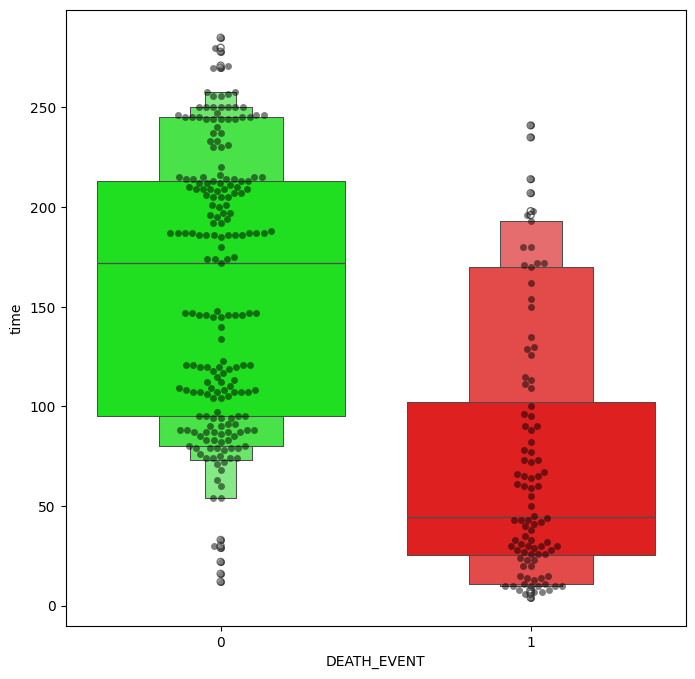

In [ ]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
    plt.show()

Saya menemukan outlier pada dataset. Saya belum menghapusnya karena dapat menyebabkan overfitting. Meskipun kita mungkin akan mendapatkan statistik yang lebih baik. Dalam kasus ini, dengan data medis, oulier mungkin menjadi faktor penentu yang penting.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing**
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)


In [ ]:
X_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [ ]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<ipython-input-21-28bc6c119c16>:4: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_df,palette = colours)


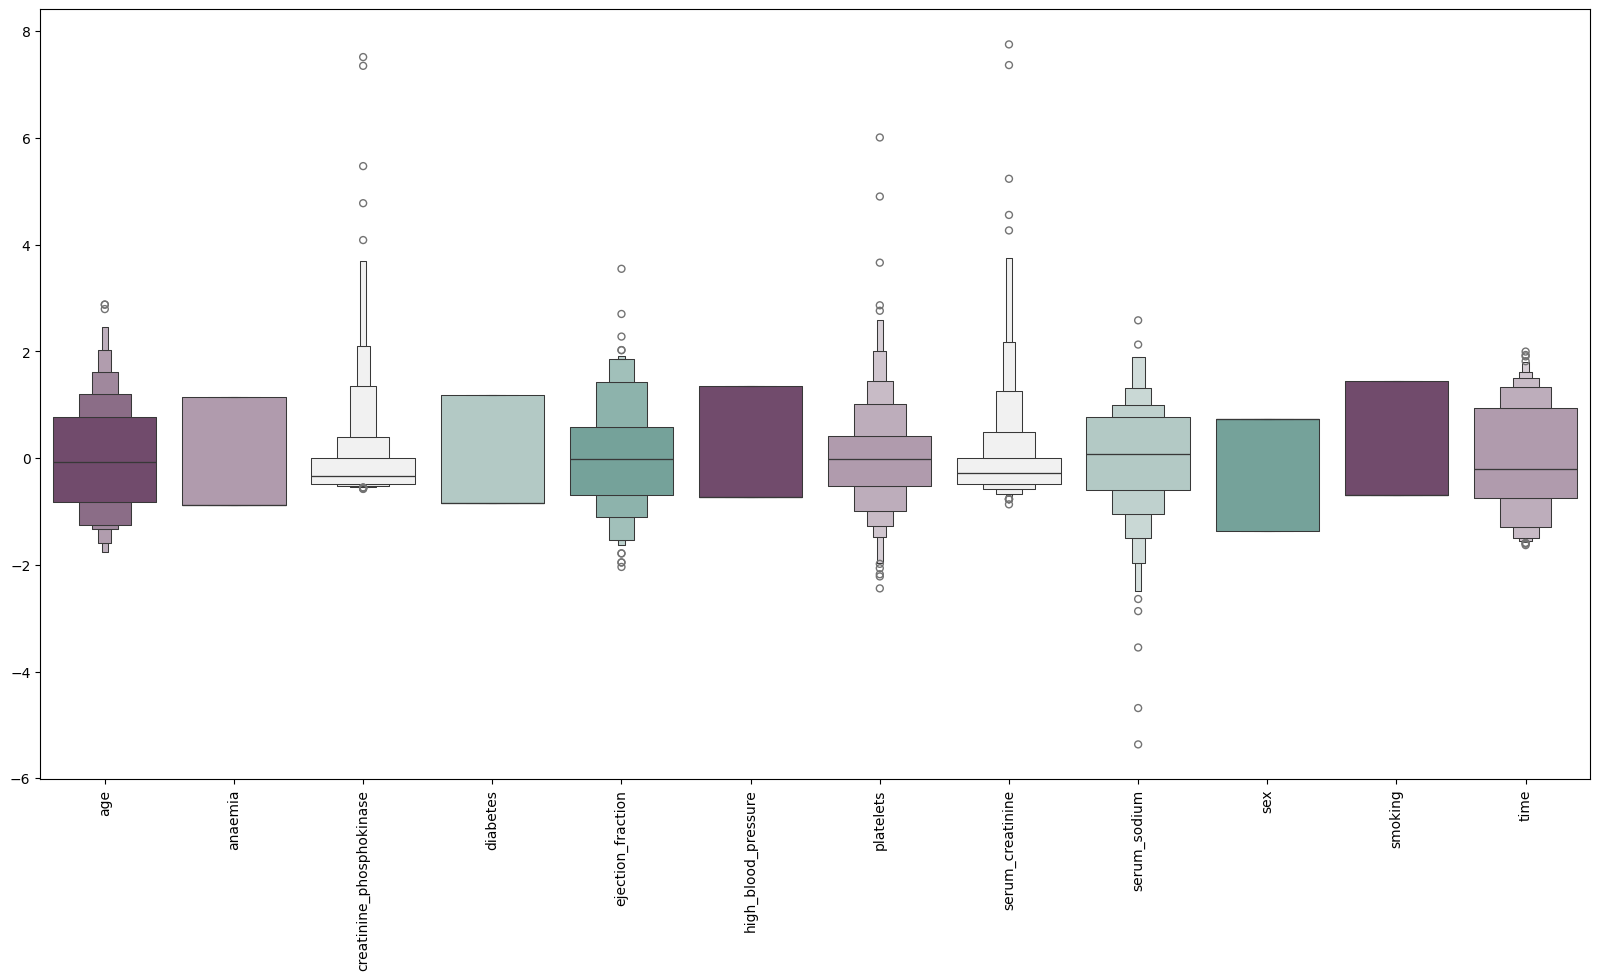

In [ ]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.20,random_state=7)

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

In this project, we build an artificial neural network.

**Following steps are involved in the model building**
* Initialising the ANN
* Defining by adding layers
* Compiling the ANN
* Train the ANN

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 4s 50ms/step - loss: 0.6928 - accuracy: 0.6073 - val_loss: 0.6921 - val_accuracy: 0.6875
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.6492 - val_loss: 0.6910 - val_accuracy: 0.6875
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6912 - accuracy: 0.6492 - val_loss: 0.6900 - val_accuracy: 0.6875
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6904 - accuracy: 0.6492 - val_loss: 0.6889 - val_accuracy: 0.6875
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6895 - accuracy: 0.6492 - val_loss: 0.6878 - val_accuracy: 0.6875
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.6492 - val_loss: 0.6867 - val_accuracy: 0.6875
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6876 - accuracy: 0.6492 - val_loss: 0.6856 - val_accuracy: 0.6875
Epoch 8/500
6/6 [======

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 79.25%


**Plotting training and validation loss over epochs**

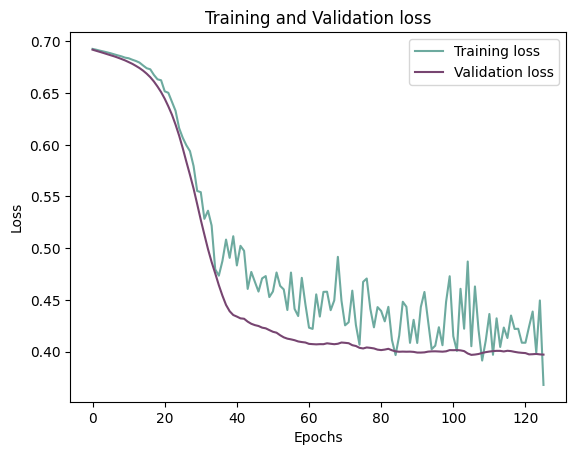

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

**Plotting training and validation accuracy over epochs**

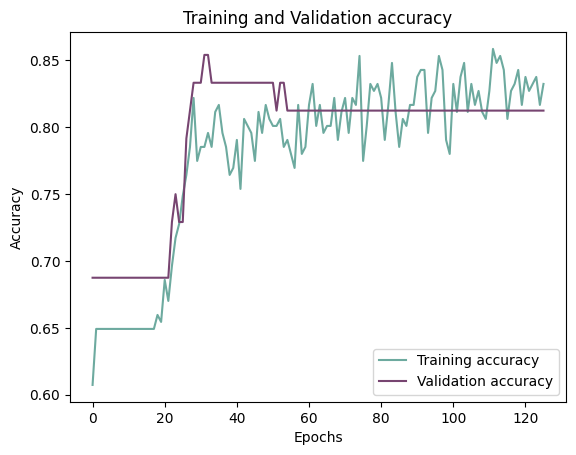

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **<span style="color:#6daa9f;">CONCLUSIONS</span>**

**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

2/2 [==============================] - 0s 6ms/step


<Axes: >

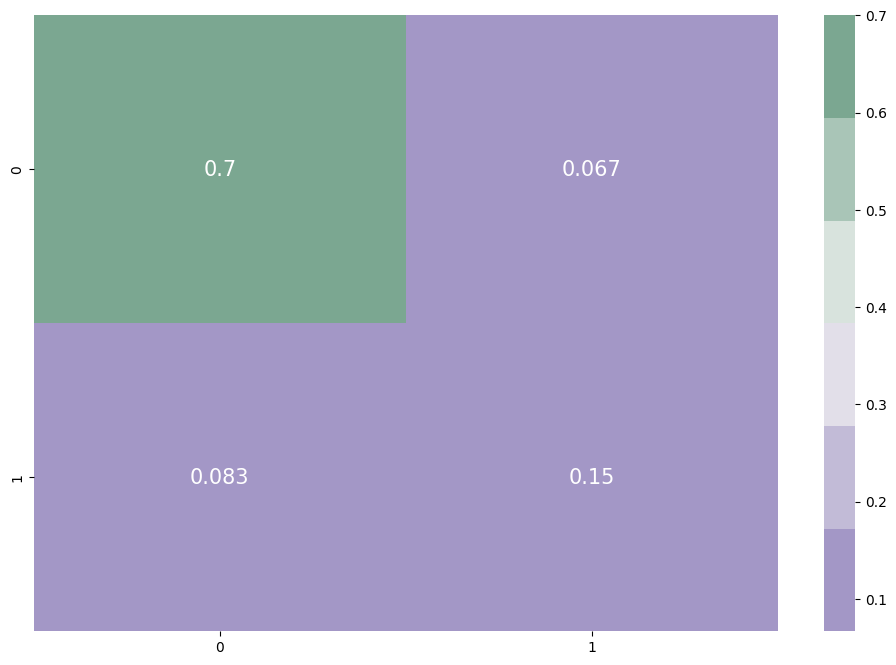

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.69      0.64      0.67        14

    accuracy                           0.85        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
y_predict_new = model.predict([[70,0,583,0,20,1,215000,1.9,130,1,0,4]])
print(y_predict_new)
if y_predict_new==1:
    print("Death")
else:
    print("Save")

1/1 [==============================] - 0s 123ms/step
[[1.]]
Death
